In [31]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import FileUpload
from IPython.display import display

# 1. Load Model
model = YOLO("yolov8n.pt")

# Target Classes (COCO Dataset index)
# 2: car, 5: bus, 7: truck
TARGET_CLASSES_ID = [2, 5, 7]

# 2. Upload Image Widget
uploader = FileUpload(accept="image/*", multiple=True)
display(uploader)

FileUpload(value=(), accept='image/*', description='Upload', multiple=True)

In [ ]:
# 3. Define Experiment Function
def run_yolov8_experiment(
    uploader,
    model,
    target_class_ids,
    conf=0.5,
    iou=0.45,
    figsize=(10, 6)
):
    """
    Jalankan inference YOLOv8 langsung dari FileUpload (in-memory),
    dengan filter class & visualisasi hasil.

    Parameters
    ----------
    uploader : ipywidgets.FileUpload
        Widget upload gambar
    model : ultralytics.YOLO
        Model YOLOv8 yang sudah di-load
    target_class_ids : list[int]
        List class ID COCO (contoh: [2,5,7])
    conf : float
        Confidence threshold
    iou : float
        IoU threshold
    figsize : tuple
        Ukuran figure matplotlib
    """

    if not uploader.value:
        print("Please upload the image first.")
        return

    # ---- Decode images (support ipywidgets lama & baru) ----
    uploaded_files = uploader.value
    images = []
    filenames = []

    iterable = (
        uploaded_files.items()
        if isinstance(uploaded_files, dict)
        else [(f["name"], f) for f in uploaded_files]
    )

    for filename, fileinfo in iterable:
        img_bytes = np.frombuffer(fileinfo["content"], np.uint8)
        img = cv2.imdecode(img_bytes, cv2.IMREAD_COLOR)

        if img is None:
            print(f"Failed to decode image: {filename}")
            continue

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        images.append(img)
        filenames.append(filename)

    if not images:
        print("There are no valid images to process.")
        return

    # ---- Inference ----
    print(f"🔍 Processing {len(images)} image...")
    results = model.predict(
        source=images,
        conf=conf,
        iou=iou,
        classes=target_class_ids,
        verbose=False
    )

    # ---- Visualisasi & Log ----
    for name, result in zip(filenames, results):
        annotated = result.plot()  # BGR
        annotated_rgb = cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=figsize)
        plt.imshow(annotated_rgb)
        plt.title(f"File: {name}")
        plt.axis("off")
        plt.show()

        if result.boxes is not None and len(result.boxes) > 0:
            print(f"Detection on {name}:")
            for box in result.boxes:
                cls_id = int(box.cls[0])
                conf_score = float(box.conf[0])
                print(f"- {model.names[cls_id]}: {conf_score:.2f}")
        else:
            print(f"No target vehicles detected on {name}")

        print("-" * 40)

Memproses 1 gambar...


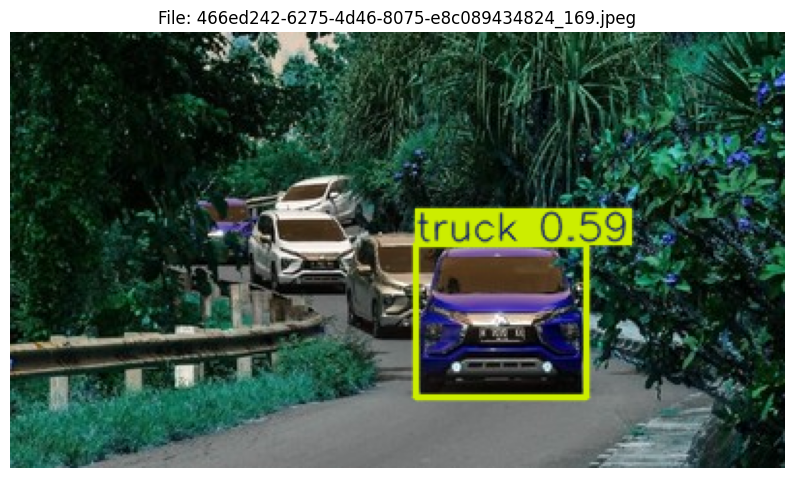

Deteksi pada 466ed242-6275-4d46-8075-e8c089434824_169.jpeg:
- truck: 0.59
------------------------------


In [ ]:
run_yolov8_experiment(
    uploader=uploader,
    model=model,
    target_class_ids=TARGET_CLASSES_ID,
    conf=0.5,
    iou=0.45
)

Memproses 1 gambar...


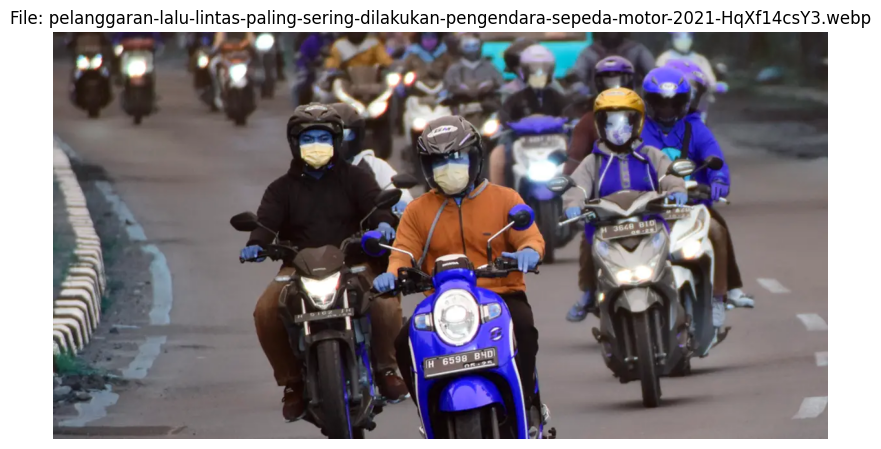

Tidak ada kendaraan target (Car/Bus/Truck) terdeteksi pada pelanggaran-lalu-lintas-paling-sering-dilakukan-pengendara-sepeda-motor-2021-HqXf14csY3.webp
------------------------------


In [ ]:
run_yolov8_experiment(
    uploader=uploader,
    model=model,
    target_class_ids=TARGET_CLASSES_ID,
    conf=0.5,
    iou=0.45
)

Memproses 1 gambar...


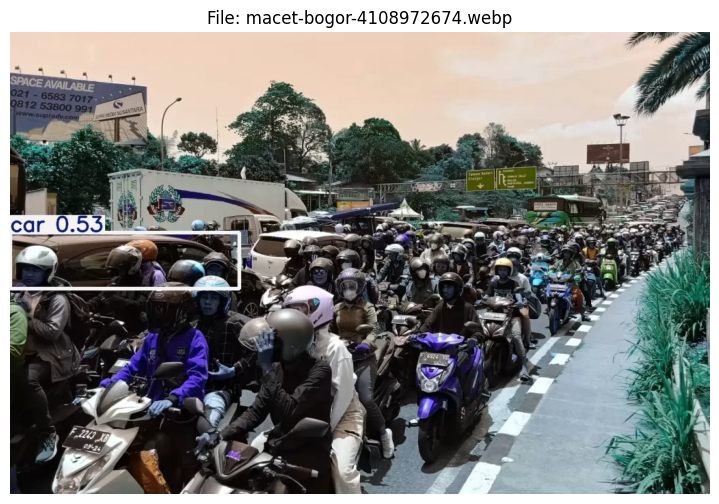

Deteksi pada macet-bogor-4108972674.webp:
- car: 0.53
------------------------------


In [ ]:
run_yolov8_experiment(
    uploader=uploader,
    model=model,
    target_class_ids=TARGET_CLASSES_ID,
    conf=0.5,
    iou=0.45
)

Memproses 1 gambar...


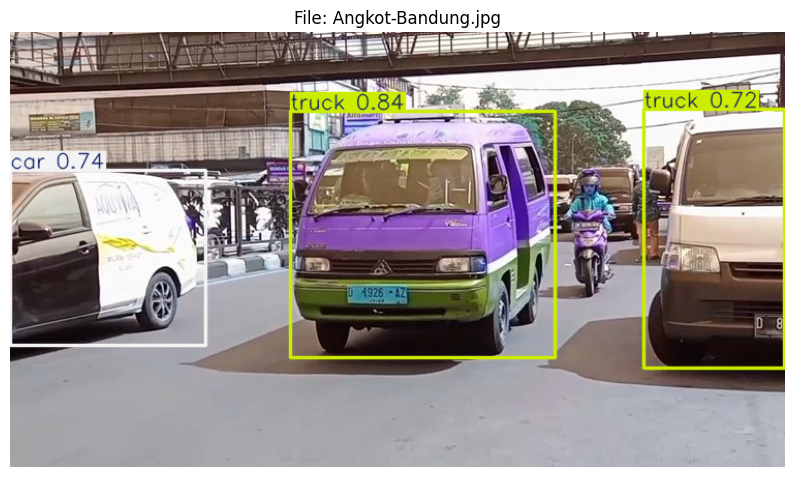

Deteksi pada Angkot-Bandung.jpg:
- truck: 0.84
- car: 0.74
- truck: 0.72
------------------------------


In [ ]:
run_yolov8_experiment(
    uploader=uploader,
    model=model,
    target_class_ids=TARGET_CLASSES_ID,
    conf=0.5,
    iou=0.45
)

Memproses 1 gambar...


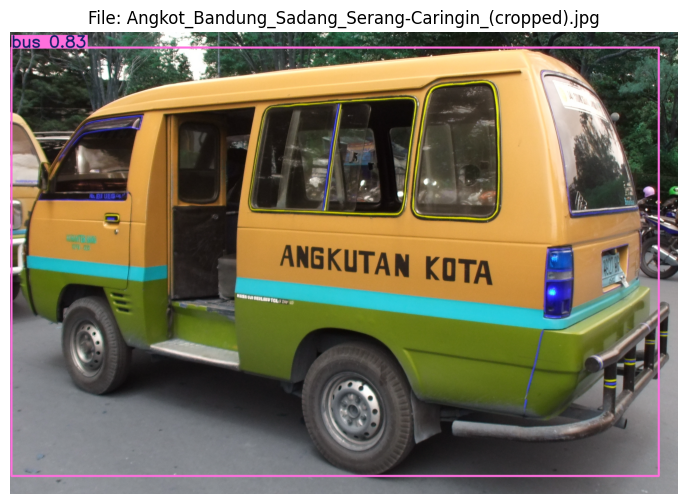

Deteksi pada Angkot_Bandung_Sadang_Serang-Caringin_(cropped).jpg:
- bus: 0.83
------------------------------


In [ ]:
run_yolov8_experiment(
    uploader=uploader,
    model=model,
    target_class_ids=TARGET_CLASSES_ID,
    conf=0.5,
    iou=0.45
)

Memproses 1 gambar...


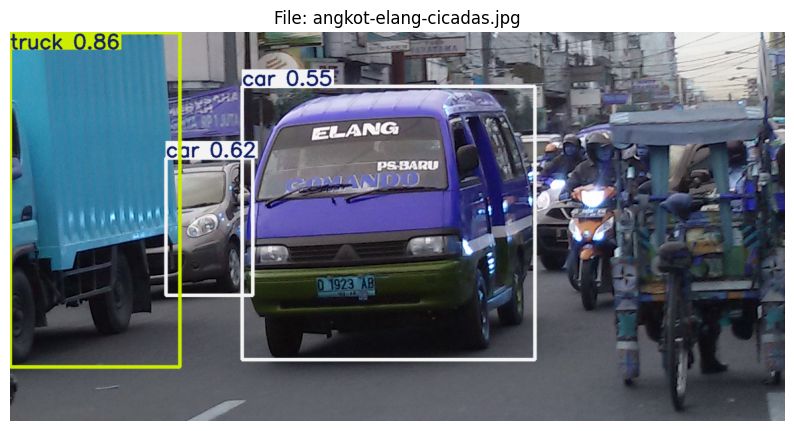

Deteksi pada angkot-elang-cicadas.jpg:
- truck: 0.86
- car: 0.62
- car: 0.55
------------------------------


In [ ]:
run_yolov8_experiment(
    uploader=uploader,
    model=model,
    target_class_ids=TARGET_CLASSES_ID,
    conf=0.5,
    iou=0.45
)

Memproses 1 gambar...


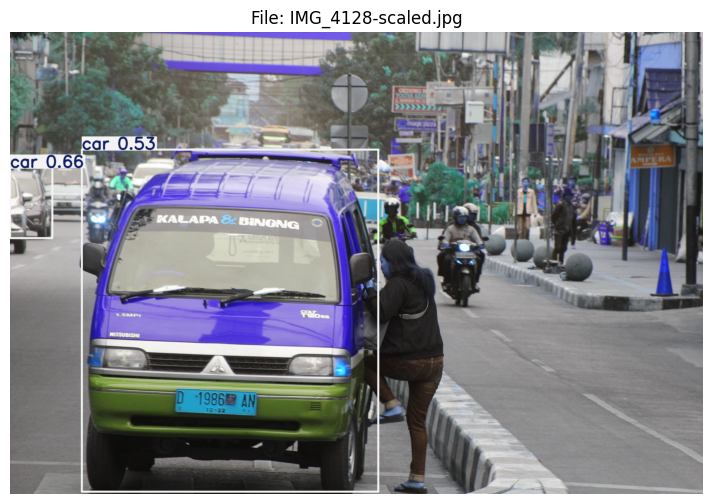

Deteksi pada IMG_4128-scaled.jpg:
- car: 0.66
- car: 0.53
------------------------------


In [ ]:
run_yolov8_experiment(
    uploader=uploader,
    model=model,
    target_class_ids=TARGET_CLASSES_ID,
    conf=0.5,
    iou=0.45
)